In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
heart_disease = pd.read_csv('Dataset/heart-disease.csv')
# heart_disease.head(5)

In [13]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
# these are features
X = heart_disease.drop('target', axis=1)

# these are target variables
y = heart_disease['target']

In [10]:
from sklearn.model_selection import train_test_split

In [19]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model = RandomForestClassifier(n_estimators=1000)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [41]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [42]:
pred = model.predict(x_test)
pred

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [43]:
y_test

228    0
139    1
61     1
152    1
221    0
      ..
32     1
45     1
106    1
204    0
60     1
Name: target, Length: 61, dtype: int64

In [44]:
model.score(x_train, y_train)

1.0

In [45]:
model.score(x_test, y_test)

0.8360655737704918

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        25
           1       0.89      0.86      0.87        36

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [38]:
print(confusion_matrix(y_test, pred))

[[21  4]
 [ 5 31]]


In [39]:
print(accuracy_score(y_test, pred))

0.8524590163934426


# data preparation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset = pd.read_csv('Dataset/car-sales-extended.csv')
dataset

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [8]:
dataset.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [10]:
x = dataset.drop('Price', axis=1)
y = dataset['Price']

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [18]:
categorical_features = ['Make', 'Colour']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one_hot',one_hot, categorical_features)], 
                              remainder = 'passthrough')
tranformed_x = tranformer.fit_transform(x)
pd.DataFrame(tranformed_x)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35431.0,4.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,192714.0,5.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,84714.0,4.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,154365.0,4.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,181577.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,35820.0,4.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,155144.0,3.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,66604.0,4.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,215883.0,4.0


In [19]:
dataset.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [20]:
dummies = pd.get_dummies(dataset.Make)
dummies

,BMW,Honda,Nissan,Toyota
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
995,0,0,0,1
996,0,0,1,0
997,0,0,1,0
998,0,1,0,0


In [21]:
dummies_1 = pd.get_dummies(dataset.Colour)

In [22]:
dummies_1

,Black,Blue,Green,Red,White
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
995,1,0,0,0,0
996,0,0,0,0,1
997,0,1,0,0,0
998,0,0,0,0,1


In [26]:
dataset["Colour"].unique()

array(['White', 'Blue', 'Red', 'Green', 'Black'], dtype=object)

In [27]:
len(dataset)

1000

In [31]:
car_sales_missing = pd.read_csv('Dataset/car-sales-extended-missing-data.csv')
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [33]:
car_sales_missing['Make'].fillna('Mising', inplace = True)
car_sales_missing['Colour'].fillna('Mising', inplace = True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace = True) 

In [42]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [35]:
car_sales_missing['Doors'].fillna(4, inplace = True)

In [41]:
car_sales_missing.dropna(inplace = True)

In [43]:
len(car_sales_missing)

950

In [44]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [50]:
car_sales_missing.describe()

,Odometer (KM),Doors,Price
count,950.000000,950.000000,950.000000
mean,131000.877283,4.007368,16042.814737
std,66947.545339,0.377095,8581.695036
min,10148.000000,3.000000,2796.000000
25%,73304.500000,4.000000,9529.250000
50%,131253.237895,4.000000,14297.000000
75%,189260.750000,4.000000,20806.250000
max,249860.000000,5.000000,52458.000000


In [51]:
car_sales_missing.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [1]:
from sklearn.datasets import fetch_california_housing

In [5]:
import pandas as pd
import numpy as np 

In [3]:
a = fetch_california_housing()
a

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [9]:
housing_df = pd.DataFrame(a['data'], columns=a['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [11]:
a.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [10]:
housing_df["target"] = pd.Series(a["target"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
x = housing_df.drop('target', axis=1)
y = housing_df['target']

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [19]:
model = Ridge()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model.fit(x_train, y_train)

Ridge()

In [20]:
model.score(x_test, y_test)

0.5788170472679974

In [23]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200)

In [24]:
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.8089853533094206

In [1]:
import pandas as pd
import numpy as np

In [4]:
heart_disease_data = pd.read_csv('dataset/heart-disease.csv')
heart_disease_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
x = heart_disease_data.drop('target', axis=1)
y = heart_disease_data['target']

In [6]:
from sklearn.model_selection import train_test_split

In [17]:
np.random.seed(40)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

In [18]:
x_test.shape

(61, 13)

In [19]:
from sklearn.svm import SVC
model = SVC(probability=True)

In [20]:
model.fit(x_train, y_train)

SVC(probability=True)

In [21]:
model.score(x_test, y_test)

0.6557377049180327

In [48]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2


In [49]:
y_test

18     1
112    1
102    1
275    0
92     1
      ..
288    0
146    1
240    0
167    0
90     1
Name: target, Length: 61, dtype: int64

In [22]:
preds = model.predict(x_test)
preds

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [51]:
np.mean(preds == y_test)

0.6557377049180327

In [52]:
pd.DataFrame(y_test)

,target
18,1
112,1
102,1
275,0
92,1
...,...
288,0
146,1
240,0
167,0


In [53]:
pred_prob = model.predict_proba(x_test)
pred_prob

array([[0.32176839, 0.67823161],
       [0.6871227 , 0.3128773 ],
       [0.22674495, 0.77325505],
       [0.2585867 , 0.7414133 ],
       [0.29510699, 0.70489301],
       [0.78973033, 0.21026967],
       [0.41953522, 0.58046478],
       [0.65251954, 0.34748046],
       [0.80891301, 0.19108699],
       [0.14347138, 0.85652862],
       [0.92710657, 0.07289343],
       [0.5       , 0.5       ],
       [0.4407387 , 0.5592613 ],
       [0.82290713, 0.17709287],
       [0.53554902, 0.46445098],
       [0.72237458, 0.27762542],
       [0.15822801, 0.84177199],
       [0.53442338, 0.46557662],
       [0.35343903, 0.64656097],
       [0.60544696, 0.39455304],
       [0.17692014, 0.82307986],
       [0.25622544, 0.74377456],
       [0.65311561, 0.34688439],
       [0.32288967, 0.67711033],
       [0.76587759, 0.23412241],
       [0.10657863, 0.89342137],
       [0.46001308, 0.53998692],
       [0.33253028, 0.66746972],
       [0.34856215, 0.65143785],
       [0.52911006, 0.47088994],
       [0.

In [55]:
from sklearn.metrics import mean_absolute_error

In [56]:
mean_absolute_error(y_test, preds)

0.3442622950819672

In [59]:
from sklearn.svm import SVC
model_1 = SVC(probability=True)

In [57]:
from sklearn.model_selection import cross_val_score

In [62]:
cross_val_score(model_1, x, y, cv=10)

array([0.58064516, 0.74193548, 0.5483871 , 0.7       , 0.8       ,
       0.73333333, 0.6       , 0.7       , 0.56666667, 0.63333333])

In [16]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.62      0.50      0.55        26
           1       0.68      0.77      0.72        35

    accuracy                           0.66        61
   macro avg       0.65      0.64      0.64        61
weighted avg       0.65      0.66      0.65        61



In [25]:
from sklearn.metrics import confusion_matrix

In [28]:
a = confusion_matrix(y_test, preds)

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

In [31]:
import matplotlib.pyplot as plt

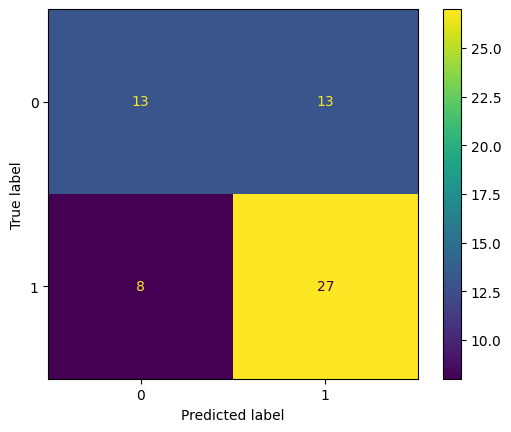

In [35]:

b = ConfusionMatrixDisplay(a)
b.plot()
plt.show()